In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sns.load_dataset("flights")
print(f'Number of Entries: {len(data)}')
data.head()

Number of Entries: 144


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


<Axes: xlabel='None', ylabel='passengers'>

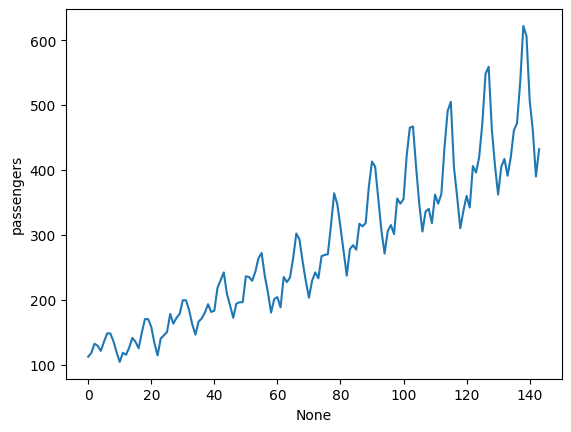

In [12]:
sns.lineplot(data=data, x=data.index, y=data['passengers'])

In [14]:
num_points = len(data)
num_points

144

In [20]:
X = data['passengers'].values.astype(np.float32)
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.], dtype=float32)

In [22]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))
X_scaled

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [23]:
X_restruct = [] 
y_restruct = [] 

for i in range(num_points-10):
     list1 = []
     for j in range(i,i+10):
         list1.append(X_scaled[j])
     X_restruct.append(list1)
     y_restruct.append(X_scaled[j+1])
X_restruct = np.array(X_restruct)
y_restruct = np.array(y_restruct)

In [33]:
X_restruct.shape

(134, 10, 1)

In [26]:
len(y_restruct)

134

In [28]:
last_n_months = 12
clip_point = len(X_restruct) - last_n_months
X_train = X_restruct[:clip_point]
X_test = X_restruct[clip_point:]
y_train = y_restruct[:clip_point]
y_test = y_restruct[clip_point:]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (122, 10, 1)
y_train shape: (122, 1)
X_test shape: (12, 10, 1)
y_test shape: (12, 1)


In [32]:
X_train

array([[[0.01544401],
        [0.02702703],
        [0.05405405],
        ...,
        [0.08494207],
        [0.06177607],
        [0.02895753]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        ...,
        [0.06177607],
        [0.02895753],
        [0.        ]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        ...,
        [0.02895753],
        [0.        ],
        [0.02702703]],

       ...,

       [[0.44980696],
        [0.49420848],
        [0.45945945],
        ...,
        [0.8571429 ],
        [0.8783784 ],
        [0.69305015]],

       [[0.49420848],
        [0.45945945],
        [0.5830116 ],
        ...,
        [0.8783784 ],
        [0.69305015],
        [0.5849421 ]],

       [[0.45945945],
        [0.5830116 ],
        [0.5637065 ],
        ...,
        [0.69305015],
        [0.5849421 ],
        [0.4980695 ]]], dtype=float32)

In [34]:
class FlightDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataloader
train_loader = DataLoader(FlightDataset(X_train, y_train), batch_size=2)
test_loader = DataLoader(FlightDataset(X_test, y_test), batch_size=len(y_test))

In [35]:
class FlightModel(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(FlightModel, self).__init__()
        self.hidden_size = 50
        self.lstm = nn.LSTM(input_size, hidden_size=self.hidden_size, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=output_size)
    
    def forward(self, x):
        output, _ = self.lstm(x)    
        output = output[:, -1, :]
        output = self.fc1(torch.relu(output))
        return output

In [36]:
model = FlightModel()

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
NUM_EPOCHS = 200

for epoch in range(NUM_EPOCHS):
    for j, data in enumerate(train_loader):
        X, y = data
       
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fun(y_pred, y)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.data}")

Epoch: 0, Loss: 0.0032767727971076965
Epoch: 10, Loss: 0.008462072350084782
Epoch: 20, Loss: 0.006734595634043217
Epoch: 30, Loss: 0.003442385233938694
Epoch: 40, Loss: 0.0010863248025998473
Epoch: 50, Loss: 0.0007410112884826958
Epoch: 60, Loss: 0.00042954712989740074
Epoch: 70, Loss: 0.0016359519213438034
Epoch: 80, Loss: 0.0002883034758269787
Epoch: 90, Loss: 0.0006317530060186982
Epoch: 100, Loss: 0.00020960895926691592
Epoch: 110, Loss: 0.0003367308818269521
Epoch: 120, Loss: 0.00021759072842542082
Epoch: 130, Loss: 0.00044346656068228185
Epoch: 140, Loss: 0.0003758486418519169
Epoch: 150, Loss: 0.0001865848753368482
Epoch: 160, Loss: 2.512173159630038e-05
Epoch: 170, Loss: 0.0004470982530619949
Epoch: 180, Loss: 0.000451916188467294
Epoch: 190, Loss: 5.28989257873036e-05


<Axes: ylabel='None'>

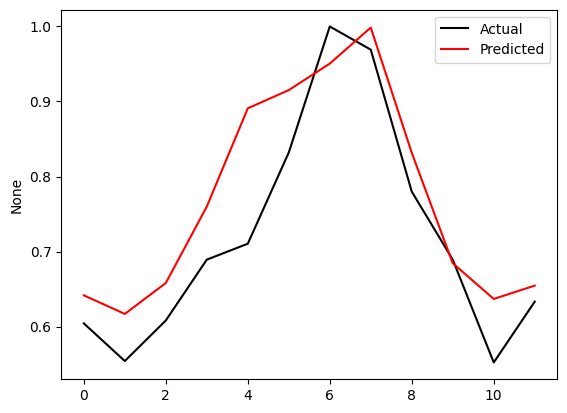

In [37]:
test_set = FlightDataset(X_test, y_test)
X_test_torch, y_test_torch = next(iter(test_loader))
with torch.no_grad():
    y_pred = model(X_test_torch)
y_act = y_test_torch.numpy().squeeze()
x_act = range(y_act.shape[0])
sns.lineplot(x=x_act, y=y_act, label = 'Actual',color='black')
sns.lineplot(x=x_act, y=y_pred.squeeze(), label = 'Predicted',color='red')

<Axes: ylabel='None'>

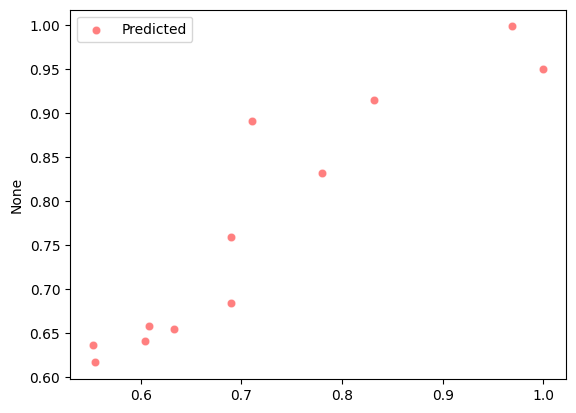

In [38]:
sns.scatterplot(x=y_act, y=y_pred.squeeze(), label = 'Predicted',color='red', alpha=0.5)